**Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
import warnings
import pickle 
warnings.filterwarnings("ignore") 

In [4]:
data = pd.read_csv("/content/Forest_fire.csv")  

In [5]:
data

,Area,Oxygen,Temperature,Humidity,Fire Occurrence,Unnamed: 5,oxygenpred,temppred,Humiditypred
0,Jharkand,40.0,45.0,20.0,1.0,NaN,40,45,20
1,Bangalore,50.0,30.0,10.0,1.0,NaN,40,44,24
2,Ecuador,10.0,20.0,70.0,0.0,NaN,40,43,28
3,a,60.0,45.0,70.0,1.0,NaN,41,45,33
4,Bangalore,30.0,48.0,10.0,1.0,NaN,41,43,36
...,...,...,...,...,...,...,...,...,...
215,NaN,NaN,NaN,NaN,NaN,NaN,61,38,20
216,NaN,NaN,NaN,NaN,NaN,NaN,63,38,24
217,NaN,NaN,NaN,NaN,NaN,NaN,67,40,27
218,NaN,NaN,NaN,NaN,NaN,NaN,69,42,30


**Univariate Analysis for oxygen prediction**

In [7]:
print(data.oxygenpred)

0      40
1      40
2      40
3      41
4      41
       ..
215    61
216    63
217    67
218    69
219    70
Name: oxygenpred, Length: 220, dtype: int64


In [8]:
data=(data["oxygenpred"])

In [9]:
data

0      40
1      40
2      40
3      41
4      41
       ..
215    61
216    63
217    67
218    69
219    70
Name: oxygenpred, Length: 220, dtype: int64

In [10]:
data.shape

(220,)

In [11]:
data.describe()

count    220.000000
mean      41.513636
std       20.564073
min        1.000000
25%       25.750000
50%       40.000000
75%       57.000000
max       88.000000
Name: oxygenpred, dtype: float64

In [12]:
import matplotlib.pyplot as plt 

In [13]:
data

0      40
1      40
2      40
3      41
4      41
       ..
215    61
216    63
217    67
218    69
219    70
Name: oxygenpred, Length: 220, dtype: int64

In [14]:
df=np.array(data)  

In [15]:
df 

array([40, 40, 40, 41, 41, 40, 45, 47, 50, 49, 48, 47, 40, 46, 45, 44, 41,
       39, 36, 35, 35, 35, 33, 32, 33, 33, 32, 30, 29, 27, 27, 26, 25, 27,
       29, 26, 23, 22, 22, 24, 21, 20, 19, 19, 15, 18, 16, 15, 13, 12, 10,
       14, 15, 18, 20, 25, 26, 22, 29, 30, 32, 35, 37, 39, 39, 36, 31, 36,
       35, 39, 40, 41, 45, 45, 46, 47, 48, 43, 47, 49, 50, 53, 54, 55, 56,
       52, 57, 58, 60, 65, 66, 69, 66, 67, 69, 72, 69, 66, 70, 73, 77, 74,
       79, 81, 83, 82, 84, 86, 88, 76, 75, 77, 80, 84, 79, 76, 74, 72, 69,
       66, 63, 69, 67, 66, 65, 62, 63, 60, 66, 60, 59, 57, 54, 52, 56, 54,
       52, 51, 49, 49, 51, 43, 44, 40, 38, 33, 32, 36, 37, 34, 32, 30, 29,
       25, 24, 22, 21, 18, 17, 16, 19, 23, 21, 16, 15, 14, 14, 14, 13, 10,
        9,  8,  6,  7,  5,  8,  4,  3,  1,  8, 12, 13, 15, 16, 19, 23, 26,
       29, 34, 36, 38, 39, 35, 34, 30, 35, 39, 39, 40, 43, 46, 42, 45, 47,
       49, 45, 47, 49, 50, 55, 57, 58, 59, 60, 65, 61, 63, 67, 69, 70])

No handles with labels found to put in legend.


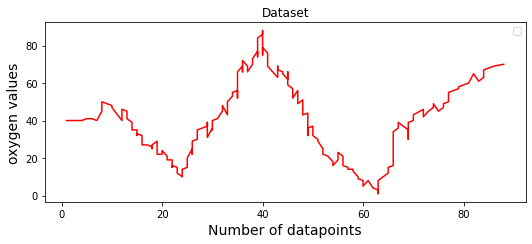

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.array([5, 4, 1, 4, 5])
y = np.sort(df)

plt.title("Dataset")
plt.plot(y, df, color="red")




plt.xlabel('Number of datapoints', fontsize=14)
plt.ylabel('oxygen values', fontsize=14)

plt.legend();
plt.savefig("datasetoxygen.png")
plt.show()

In [18]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps  
		# check if we are beyond the sequence 
		if end_ix > len(sequence)-1: 
			break         
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

**Convert unsupervised data to supervised data**

In [19]:
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = df
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[40 40 40] 41
[40 40 41] 41
[40 41 41] 40
[41 41 40] 45
[41 40 45] 47
[40 45 47] 50
[45 47 50] 49
[47 50 49] 48
[50 49 48] 47
[49 48 47] 40
[48 47 40] 46
[47 40 46] 45
[40 46 45] 44
[46 45 44] 41
[45 44 41] 39
[44 41 39] 36
[41 39 36] 35
[39 36 35] 35
[36 35 35] 35
[35 35 35] 33
[35 35 33] 32
[35 33 32] 33
[33 32 33] 33
[32 33 33] 32
[33 33 32] 30
[33 32 30] 29
[32 30 29] 27
[30 29 27] 27
[29 27 27] 26
[27 27 26] 25
[27 26 25] 27
[26 25 27] 29
[25 27 29] 26
[27 29 26] 23
[29 26 23] 22
[26 23 22] 22
[23 22 22] 24
[22 22 24] 21
[22 24 21] 20
[24 21 20] 19
[21 20 19] 19
[20 19 19] 15
[19 19 15] 18
[19 15 18] 16
[15 18 16] 15
[18 16 15] 13
[16 15 13] 12
[15 13 12] 10
[13 12 10] 14
[12 10 14] 15
[10 14 15] 18
[14 15 18] 20
[15 18 20] 25
[18 20 25] 26
[20 25 26] 22
[25 26 22] 29
[26 22 29] 30
[22 29 30] 32
[29 30 32] 35
[30 32 35] 37
[32 35 37] 39
[35 37 39] 39
[37 39 39] 36
[39 39 36] 31
[39 36 31] 36
[36 31 36] 35
[31 36 35] 39
[36 35 39] 40
[35 39 40] 41
[39 40 41] 45
[40 41 45] 45
[41 45

In [20]:
X

array([[40, 40, 40],
       [40, 40, 41],
       [40, 41, 41],
       [41, 41, 40],
       [41, 40, 45],
       [40, 45, 47],
       [45, 47, 50],
       [47, 50, 49],
       [50, 49, 48],
       [49, 48, 47],
       [48, 47, 40],
       [47, 40, 46],
       [40, 46, 45],
       [46, 45, 44],
       [45, 44, 41],
       [44, 41, 39],
       [41, 39, 36],
       [39, 36, 35],
       [36, 35, 35],
       [35, 35, 35],
       [35, 35, 33],
       [35, 33, 32],
       [33, 32, 33],
       [32, 33, 33],
       [33, 33, 32],
       [33, 32, 30],
       [32, 30, 29],
       [30, 29, 27],
       [29, 27, 27],
       [27, 27, 26],
       [27, 26, 25],
       [26, 25, 27],
       [25, 27, 29],
       [27, 29, 26],
       [29, 26, 23],
       [26, 23, 22],
       [23, 22, 22],
       [22, 22, 24],
       [22, 24, 21],
       [24, 21, 20],
       [21, 20, 19],
       [20, 19, 19],
       [19, 19, 15],
       [19, 15, 18],
       [15, 18, 16],
       [18, 16, 15],
       [16, 15, 13],
       [15, 1

In [21]:
y

array([41, 41, 40, 45, 47, 50, 49, 48, 47, 40, 46, 45, 44, 41, 39, 36, 35,
       35, 35, 33, 32, 33, 33, 32, 30, 29, 27, 27, 26, 25, 27, 29, 26, 23,
       22, 22, 24, 21, 20, 19, 19, 15, 18, 16, 15, 13, 12, 10, 14, 15, 18,
       20, 25, 26, 22, 29, 30, 32, 35, 37, 39, 39, 36, 31, 36, 35, 39, 40,
       41, 45, 45, 46, 47, 48, 43, 47, 49, 50, 53, 54, 55, 56, 52, 57, 58,
       60, 65, 66, 69, 66, 67, 69, 72, 69, 66, 70, 73, 77, 74, 79, 81, 83,
       82, 84, 86, 88, 76, 75, 77, 80, 84, 79, 76, 74, 72, 69, 66, 63, 69,
       67, 66, 65, 62, 63, 60, 66, 60, 59, 57, 54, 52, 56, 54, 52, 51, 49,
       49, 51, 43, 44, 40, 38, 33, 32, 36, 37, 34, 32, 30, 29, 25, 24, 22,
       21, 18, 17, 16, 19, 23, 21, 16, 15, 14, 14, 14, 13, 10,  9,  8,  6,
        7,  5,  8,  4,  3,  1,  8, 12, 13, 15, 16, 19, 23, 26, 29, 34, 36,
       38, 39, 35, 34, 30, 35, 39, 39, 40, 43, 46, 42, 45, 47, 49, 45, 47,
       49, 50, 55, 57, 58, 59, 60, 65, 61, 63, 67, 69, 70])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape

(173, 3)

In [24]:
y_train.shape

(173,)

In [25]:
X_test.shape

(44, 3)

In [26]:
y_test.shape

(44,)

In [27]:
from keras.layers import *
from keras.models import Sequential

In [28]:
n_features=1

**Vanilla LSTM**

In [29]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features))) 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [30]:
...
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features)) 

**Training**

In [31]:
# fit model
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
6/6 [==============================] - 4s 11ms/step - loss: 1834.2045
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 1550.7203
Epoch 3/200
6/6 [==============================] - 0s 8ms/step - loss: 1256.8719
Epoch 4/200
6/6 [==============================] - 0s 7ms/step - loss: 948.2464
Epoch 5/200
6/6 [==============================] - 0s 9ms/step - loss: 584.0950
Epoch 6/200
6/6 [==============================] - 0s 7ms/step - loss: 172.5813
Epoch 7/200
6/6 [==============================] - 0s 9ms/step - loss: 60.7674
Epoch 8/200
6/6 [==============================] - 0s 8ms/step - loss: 70.4012
Epoch 9/200
6/6 [==============================] - 0s 7ms/step - loss: 25.3809
Epoch 10/200
6/6 [==============================] - 0s 8ms/step - loss: 26.8174
Epoch 11/200
6/6 [==============================] - 0s 8ms/step - loss: 26.6084
Epoch 12/200
6/6 [==============================] - 0s 8ms/step - loss: 22.5900
Epoch 13/200
6/6 [=====================

**Testing Phase**

In [32]:
for i in range(len(X_test)): 
  x_input = array(X_test[i])
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=0)
  print(yhat)

[[46.901413]]
[[32.12936]]
[[47.278114]]
[[49.211876]]
[[49.736393]]
[[16.073912]]
[[43.544052]]
[[68.79277]]
[[20.30838]]
[[34.719627]]
[[68.027115]]
[[13.911492]]
[[50.78794]]
[[69.825966]]
[[24.304708]]
[[79.6526]]
[[52.452724]]
[[35.74055]]
[[79.248245]]
[[60.570396]]
[[72.36464]]
[[19.5539]]
[[54.888798]]
[[19.271557]]
[[66.95633]]
[[26.392715]]
[[22.477842]]
[[68.594025]]
[[39.41577]]
[[15.298414]]
[[56.634686]]
[[31.310217]]
[[35.10095]]
[[28.463087]]
[[51.32621]]
[[43.62405]]
[[39.013462]]
[[62.782627]]
[[58.04585]]
[[26.422834]]
[[9.3272]]
[[69.27131]]
[[8.004673]]
[[21.265783]]


In [33]:
l=[]
for i in range(len(X_test)): 
  x_input = array(X_test[i])
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=0)
  yhat.reshape(1)
  l.append(yhat)


  

In [34]:
tej = [arr.tolist() for arr in l]

In [35]:
flatList = [ item for elem in tej for item in elem]
print('Flat List : ', flatList)        

Flat List :  [[46.90141296386719], [32.12936019897461], [47.278114318847656], [49.211875915527344], [49.736392974853516], [16.073911666870117], [43.54405212402344], [68.79277038574219], [20.308380126953125], [34.719627380371094], [68.02711486816406], [13.911492347717285], [50.787940979003906], [69.82596588134766], [24.30470848083496], [79.65260314941406], [52.45272445678711], [35.74055099487305], [79.24824523925781], [60.570396423339844], [72.36463928222656], [19.55389976501465], [54.888797760009766], [19.271556854248047], [66.95632934570312], [26.392715454101562], [22.477842330932617], [68.59402465820312], [39.415771484375], [15.29841423034668], [56.63468551635742], [31.310216903686523], [35.100948333740234], [28.46308708190918], [51.326210021972656], [43.62405014038086], [39.01346206665039], [62.78262710571289], [58.04584884643555], [26.422834396362305], [9.327199935913086], [69.27130889892578], [8.00467300415039], [21.265783309936523]]


In [36]:
flat = [ item for elem in flatList for item in elem]
print('Flat List : ', flat)  

Flat List :  [46.90141296386719, 32.12936019897461, 47.278114318847656, 49.211875915527344, 49.736392974853516, 16.073911666870117, 43.54405212402344, 68.79277038574219, 20.308380126953125, 34.719627380371094, 68.02711486816406, 13.911492347717285, 50.787940979003906, 69.82596588134766, 24.30470848083496, 79.65260314941406, 52.45272445678711, 35.74055099487305, 79.24824523925781, 60.570396423339844, 72.36463928222656, 19.55389976501465, 54.888797760009766, 19.271556854248047, 66.95632934570312, 26.392715454101562, 22.477842330932617, 68.59402465820312, 39.415771484375, 15.29841423034668, 56.63468551635742, 31.310216903686523, 35.100948333740234, 28.46308708190918, 51.326210021972656, 43.62405014038086, 39.01346206665039, 62.78262710571289, 58.04584884643555, 26.422834396362305, 9.327199935913086, 69.27130889892578, 8.00467300415039, 21.265783309936523]


In [37]:
my_array = np.asarray(flat)

In [38]:
my_array

array([46.90141296, 32.1293602 , 47.27811432, 49.21187592, 49.73639297,
       16.07391167, 43.54405212, 68.79277039, 20.30838013, 34.71962738,
       68.02711487, 13.91149235, 50.78794098, 69.82596588, 24.30470848,
       79.65260315, 52.45272446, 35.74055099, 79.24824524, 60.57039642,
       72.36463928, 19.55389977, 54.88879776, 19.27155685, 66.95632935,
       26.39271545, 22.47784233, 68.59402466, 39.41577148, 15.29841423,
       56.63468552, 31.3102169 , 35.10094833, 28.46308708, 51.32621002,
       43.62405014, 39.01346207, 62.78262711, 58.04584885, 26.4228344 ,
        9.32719994, 69.2713089 ,  8.004673  , 21.26578331])

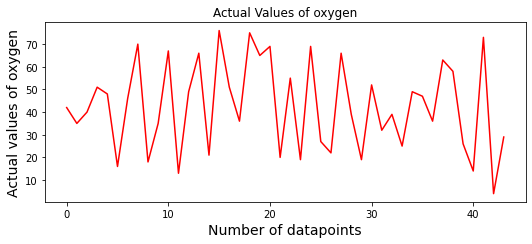

In [39]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True



plt.title("Actual Values of oxygen")
plt.plot(y_test, color="red")
plt.xlabel('Number of datapoints', fontsize=14)
plt.ylabel('Actual values of oxygen', fontsize=14)
plt.savefig("actualoxygen.png")
plt.show()

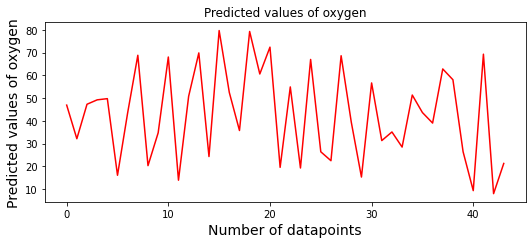

In [40]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True



plt.title("Predicted values of oxygen")
plt.plot(my_array, color="red")
plt.xlabel('Number of datapoints', fontsize=14)
plt.ylabel('Predicted values of oxygen', fontsize=14)
plt.savefig("predictedoxygen.png")
plt.show()

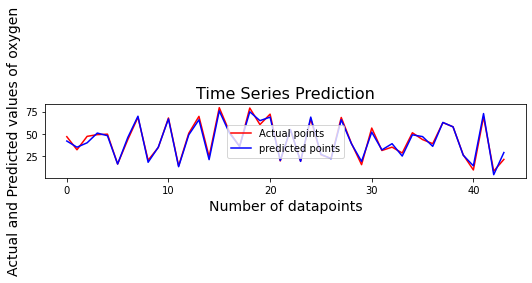

In [41]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True



plt.title('Time Series Prediction', fontsize=16)
plt.xlabel('Number of datapoints', fontsize=14)
plt.ylabel('Actual and Predicted values of oxygen', fontsize=14)
plt.plot(my_array, color="red",label='Actual points')
plt.plot(y_test,color='b',label='predicted points')
plt.legend();
plt.savefig("oxygen.png")
plt.show()